In [498]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')

In [612]:
df=pd.read_csv('baseball.csv')

In [613]:
df.shape

(30, 17)

In [614]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


### The dataset is very small with only 30 rows and 17 columns and no null values.

In [616]:
df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79])

In [617]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [618]:
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

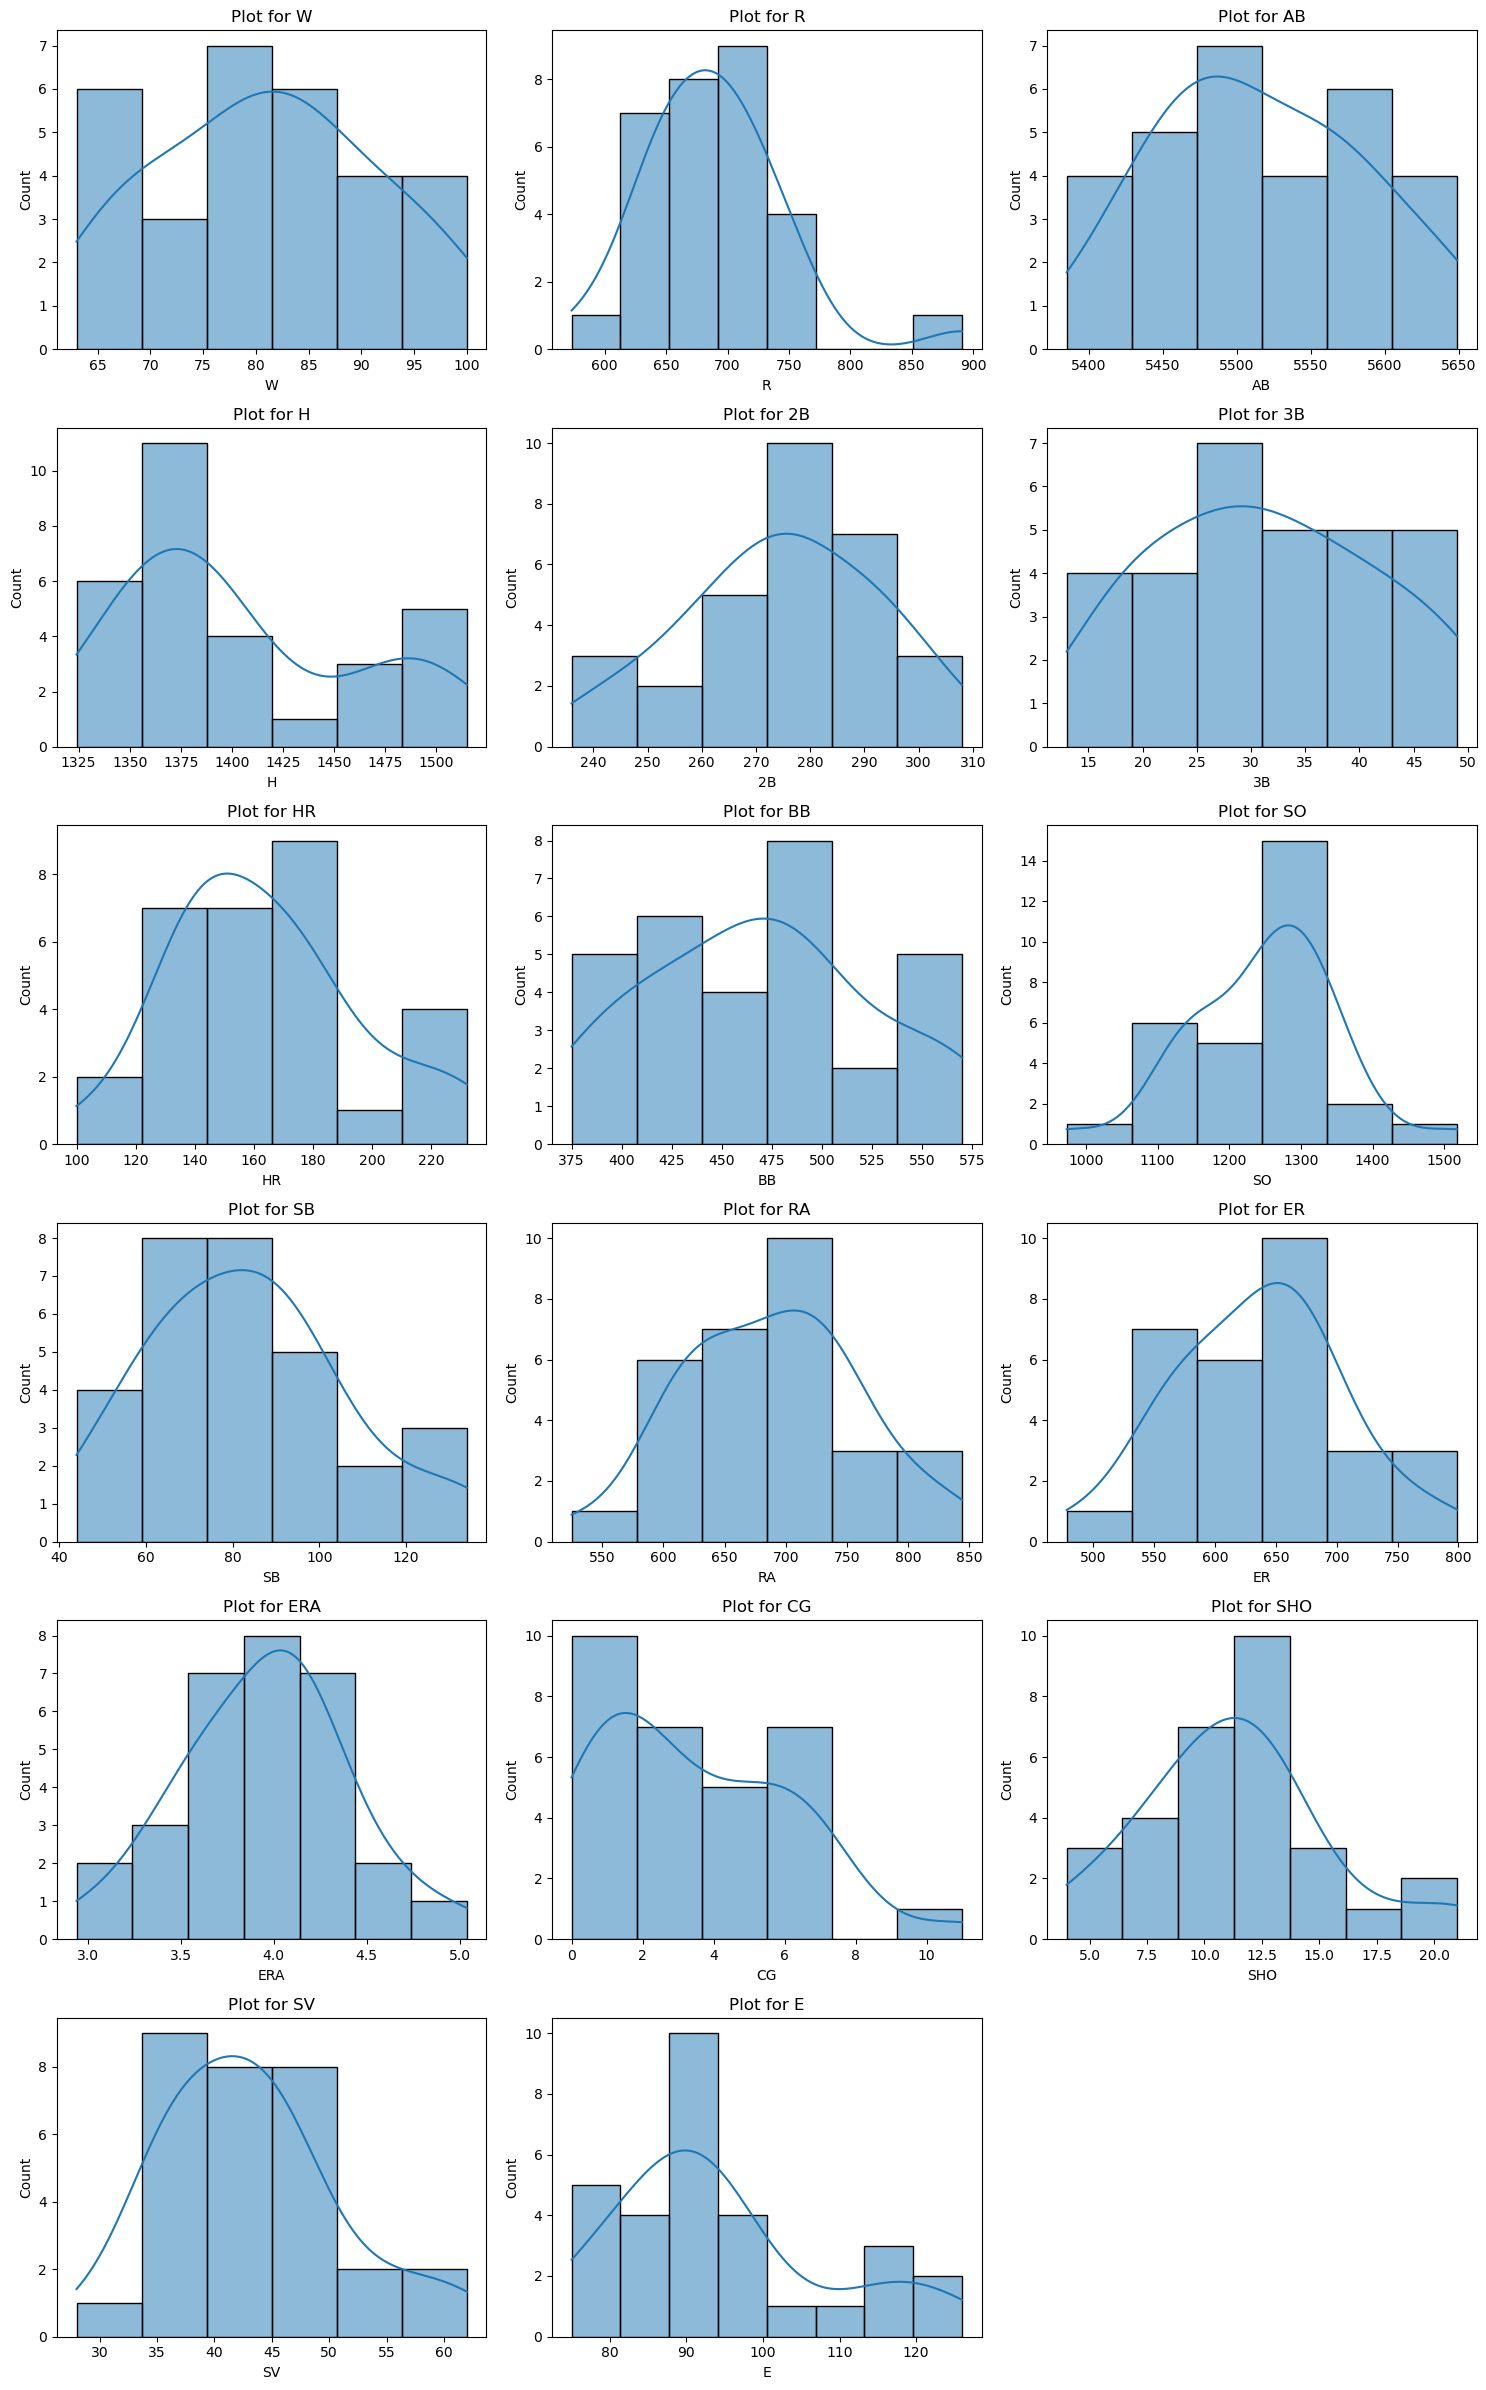

In [619]:
plt.figure(figsize=(15, 24))

for num,i in enumerate(df.columns):
    plt.subplot(6,3,num+1)
    sns.histplot(x=i,data=df,kde=True)
    plt.title(f'Plot for {i}')
    plt.xlabel(i)
plt.tight_layout()
plt.show()

#### The distribution of almost all columns are close to normal with a slight skewness R,So,CG and E.

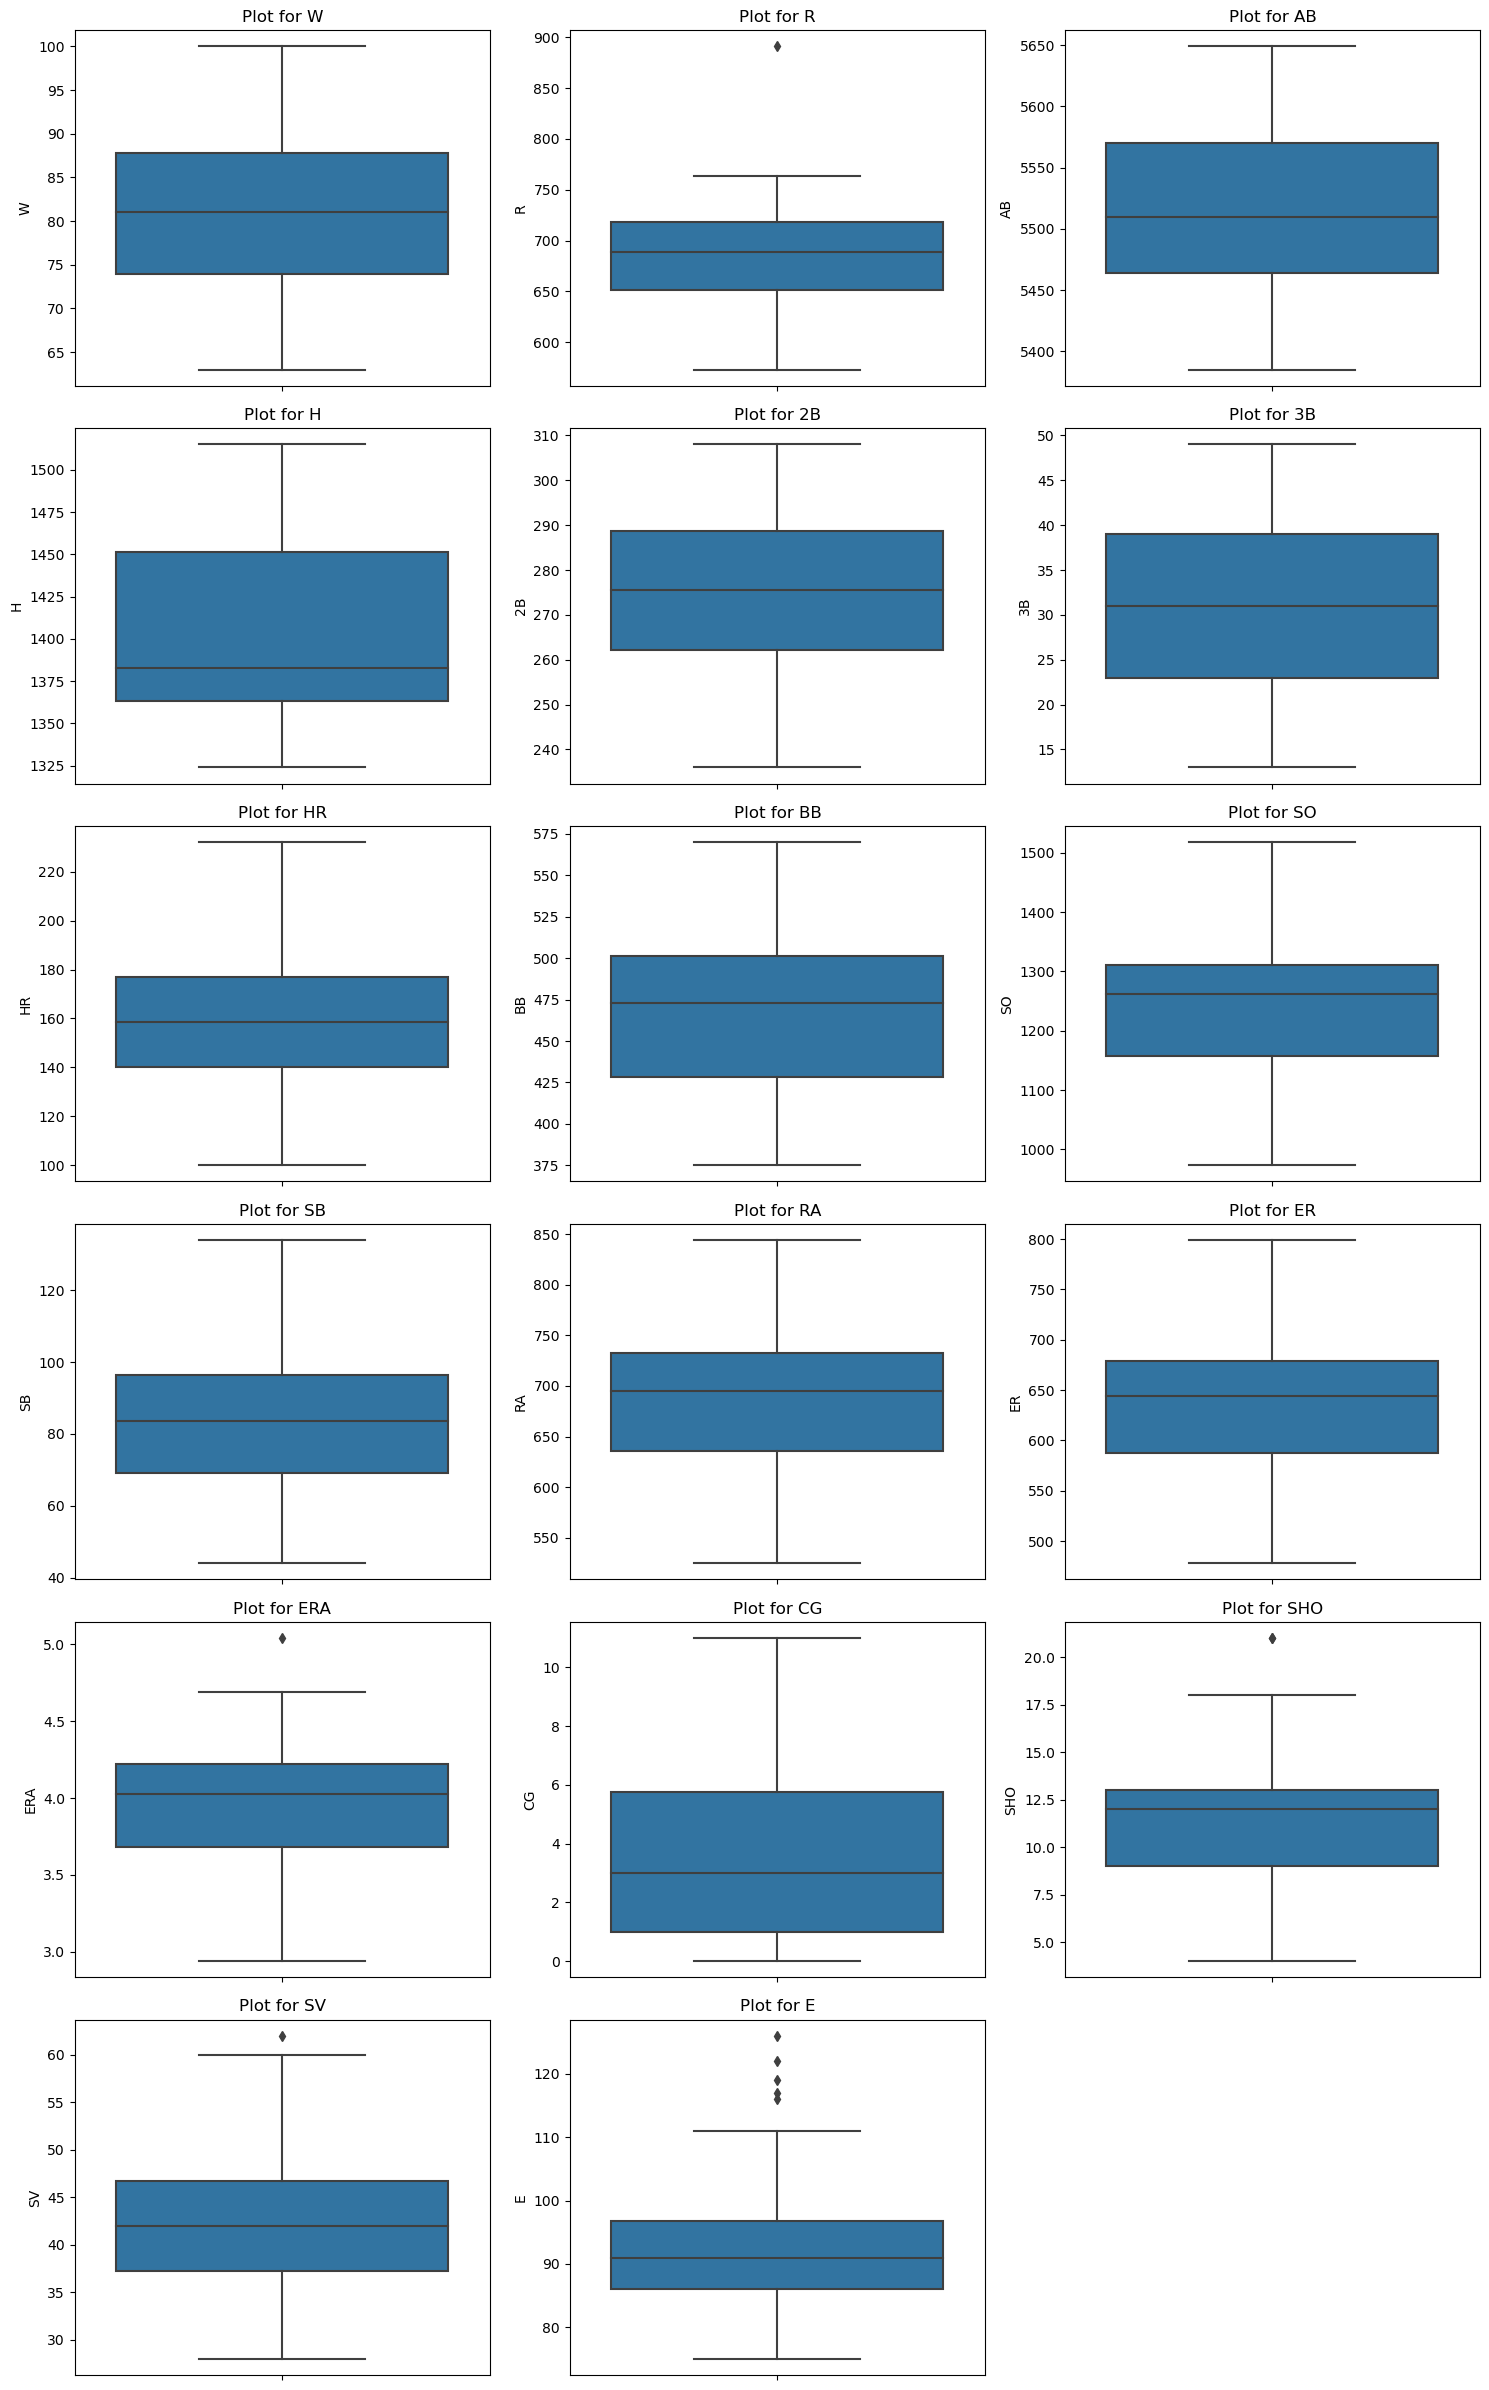

In [620]:
plt.figure(figsize=(15, 24))

for num,i in enumerate(df.columns):
    plt.subplot(6,3,num+1)
    sns.boxplot(y=i,data=df)
    plt.title(f'Plot for {i}')
    plt.ylabel(i)
plt.tight_layout()
plt.show()

##### There are a few ouliers and considering the small size of data the outliers can mislead the model and hence they should be removed.

In [389]:
outlier_cols=['E','SV','SHO','ERA','R']

In [622]:
th=1.5
for ol in outlier_cols:
    Q1=df[ol].quantile(0.25)
    Q3=df[ol].quantile(0.75)
    IQR=Q3-Q1
    lower = Q1 - th * IQR
    upper = Q3 + th * IQR
    df = df[(df[ol] >= lower) & (df[ol] <= upper)]
    

In [623]:
df.shape # after removing outliers we are left with only 18 rows and 17 columns which is a concern

(18, 17)

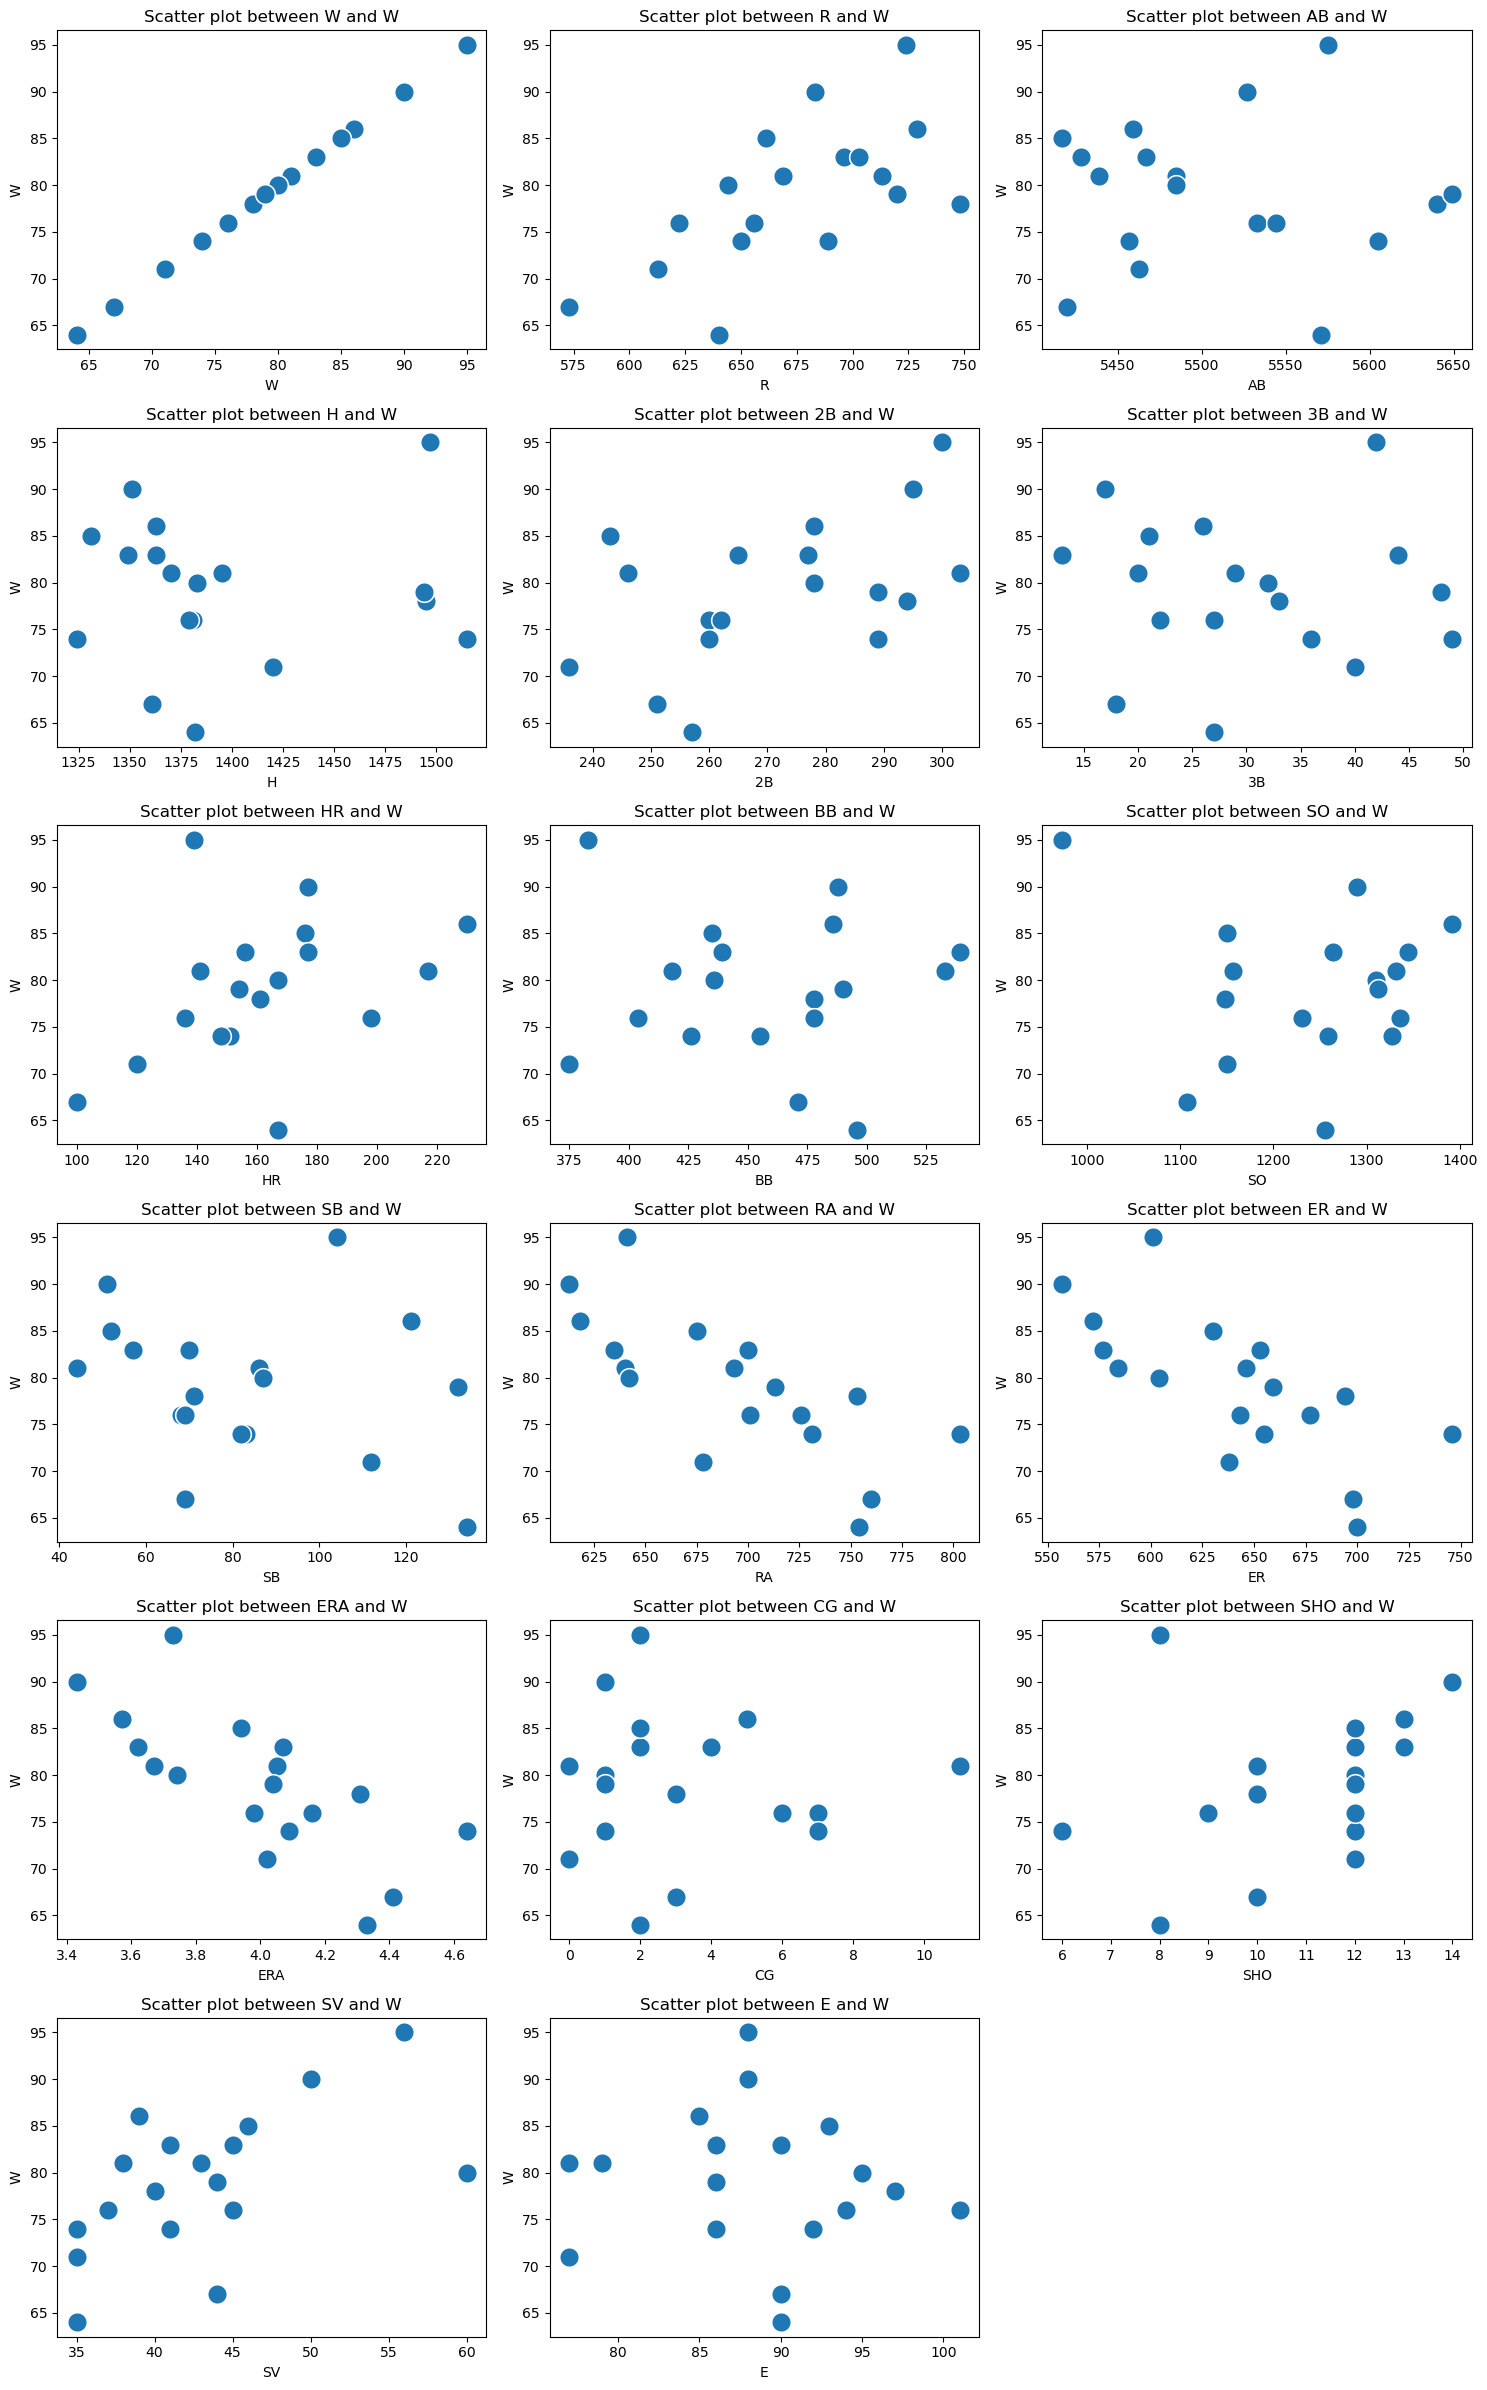

In [624]:
plt.figure(figsize=(15, 24))
for num,i in enumerate(df.columns):
    plt.subplot(6,3,num+1)
    plt.title(f'Scatter plot between {i} and W')
    sns.scatterplot(x=df[i],y=df['W'],s=200)
    plt.xlabel(i)
    plt.ylabel('W')
plt.tight_layout()
plt.show()
# checking the distribution of columns with respect to target column W

### R,HR,SHO,SV have a positive linear relationship with W.As these feature increase the value of W also increases
### ER,ERA,RA have a negative linear correlation with W. As these features increases , W decreases.

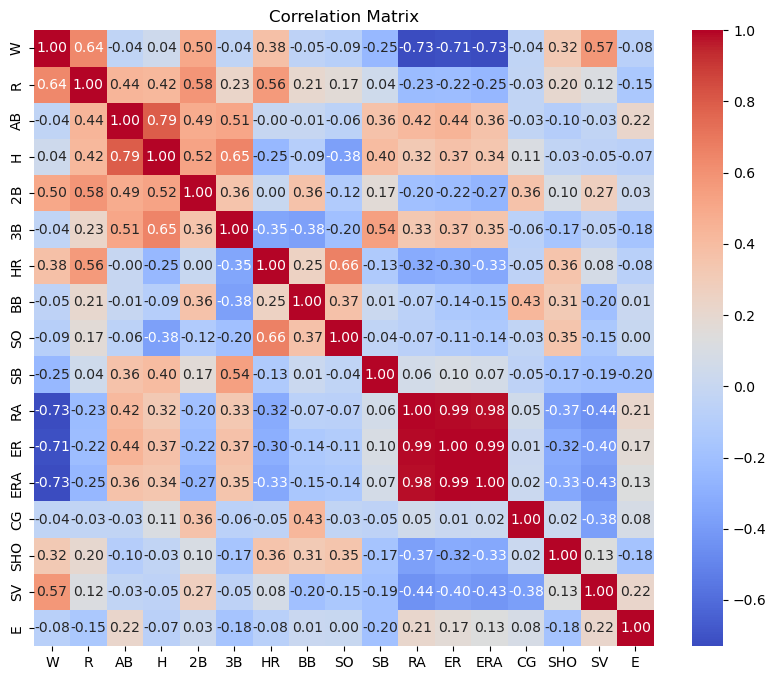

In [625]:
# CHECKING CORRELATION OF COLUMNS
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### From the heatmap it is evident there is a high positive correclation between the columns RA,ER and ERA and also between H and AB/3B. Also the columns RA,ER and ERA share a highly negative correlation with the target columns W. There is high positive correlation between R/2B/HR/SV and W.

In [626]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_val=pd.DataFrame()
vif_val['features']=df.columns
vif=[]

for i in range(df.shape[1]):
    vif.append(variance_inflation_factor(df.values,i))

vif_val['vif']=vif
vif_val = vif_val.sort_values(by='vif', ascending=False)

vif_val




,features,vif
11,ER,143006.402473
10,RA,113963.145289
12,ERA,41379.291563
2,AB,33277.255703
1,R,14983.459283
3,H,12874.567956
0,W,7191.518830
8,SO,3329.711942
4,2B,3167.302921
7,BB,2274.500173


##### Based on the above VIF score and Heatmap we can derive that ER,ERA,RA,AB,R and H is hightly correlated with other columns with highest vif scores. These will introduce multicolinearity and result in poor training results. Also all the features ER,ERA and RA are highly negatively correlated with target. I have decided to drop all the features whole vif value is higher than or equal to 10000.  Hence dropping ER,ERA,RA,AB,R and H.

In [648]:
df.drop(['ERA','ER','RA','AB','R','H'],axis=1,inplace=True)

In [649]:
df

,W,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,95,300,42,139,383,973,104,2,8,56,88
1,83,277,44,156,439,1264,70,2,12,45,86
2,81,303,29,141,533,1157,86,11,10,38,79
3,76,260,27,136,404,1231,68,7,9,37,101
4,74,289,49,151,455,1259,83,7,12,35,86
7,81,246,20,217,418,1331,44,0,10,43,77
8,80,278,32,167,436,1310,87,1,12,60,95
9,78,294,33,161,478,1148,71,3,10,40,97
11,86,278,26,230,486,1392,121,5,13,39,85
12,85,243,21,176,435,1150,52,2,12,46,93


In [656]:

rows_to_add = 200

variation_percentage = 0.01  # 1% variation

new_rows = []

for _ in range(rows_to_add):
    
    variation = np.random.uniform(-variation_percentage, variation_percentage, df.shape[1])
    new_row = df + (df * variation)
    new_rows.append(new_row)


df_new = pd.concat(new_rows, axis=0)
df_combined = pd.concat([df, df_new], axis=0)
df_combined.reset_index(drop=True, inplace=True)

### The above code is augmenting the feature by adding a small variance of 1% to the existing dataset, which will add 3600 more rows to the dataset. Making the dataset 3618 rows. This is done because the 18row small dataset would not allow the model to learn from the dataset. This will cause either underfitting or overfitting issues.

In [657]:
df_combined # now the number of rows are 3618(3600 newly added ones and 18 from the original)

,W,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,95.000000,300.000000,42.000000,139.000000,383.000000,973.000000,104.000000,2.000000,8.000000,56.000000,88.000000
1,83.000000,277.000000,44.000000,156.000000,439.000000,1264.000000,70.000000,2.000000,12.000000,45.000000,86.000000
2,81.000000,303.000000,29.000000,141.000000,533.000000,1157.000000,86.000000,11.000000,10.000000,38.000000,79.000000
3,76.000000,260.000000,27.000000,136.000000,404.000000,1231.000000,68.000000,7.000000,9.000000,37.000000,101.000000
4,74.000000,289.000000,49.000000,151.000000,455.000000,1259.000000,83.000000,7.000000,12.000000,35.000000,86.000000
...,...,...,...,...,...,...,...,...,...,...,...
3613,82.541483,262.604467,13.030374,177.246425,542.953060,1336.180027,56.521397,4.014985,12.879724,41.407394,89.226335
3614,70.607774,233.866620,40.093459,120.167068,377.750274,1143.308803,111.059587,0.000000,11.888976,35.347776,76.338087
3615,66.629872,248.731023,18.042056,100.139223,474.454344,1100.558996,68.420638,3.011239,9.907480,44.437204,89.226335
3616,78.563580,286.387513,48.112151,154.214404,493.593691,1304.366217,130.891656,1.003746,11.888976,44.437204,85.260720


In [658]:
x=df_combined.drop(['W'],axis=1) #Seperating x label

In [659]:
y=df_combined['W']  # Fetching y label

In [660]:
x.shape

(3618, 10)

In [661]:
y

0       95.000000
1       83.000000
2       81.000000
3       76.000000
4       74.000000
          ...    
3613    82.541483
3614    70.607774
3615    66.629872
3616    78.563580
3617    73.591201
Name: W, Length: 3618, dtype: float64

In [662]:
#Feature selection process: Getting feature importance scores
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x, y)
feature_importances = rfr.feature_importances_

In [663]:
feature_importances

array([0.29233052, 0.01292379, 0.01232711, 0.03650162, 0.02610498,
       0.07034383, 0.01156854, 0.05147184, 0.40359624, 0.08283153])

In [664]:
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names,'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
8,SV,0.403596
0,2B,0.292331
9,E,0.082832
5,SB,0.070344
7,SHO,0.051472
3,BB,0.036502
4,SO,0.026105
1,3B,0.012924
2,HR,0.012327
6,CG,0.011569


In [637]:
# Keeping all columns for now. Will drop later if required

In [665]:
x.shape

(3618, 10)

In [666]:
x.head()

,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,300.0,42.0,139.0,383.0,973.0,104.0,2.0,8.0,56.0,88.0
1,277.0,44.0,156.0,439.0,1264.0,70.0,2.0,12.0,45.0,86.0
2,303.0,29.0,141.0,533.0,1157.0,86.0,11.0,10.0,38.0,79.0
3,260.0,27.0,136.0,404.0,1231.0,68.0,7.0,9.0,37.0,101.0
4,289.0,49.0,151.0,455.0,1259.0,83.0,7.0,12.0,35.0,86.0


In [667]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)
# Splitting into training and testing sets

In [668]:
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('model',LinearRegression()),
])
# Creating pipeline to executed standard scaler and then execute the model 

In [672]:
param_grid = [
    {
        'model': [LinearRegression()]
        #'model__fit_intercept': [True, False]
        #'model__normalize': [True, False]
    },
    {
        'model': [RandomForestRegressor()]
        #'model__n_estimators': [100, 200, 300, 500],
        #'model__max_depth': [None, 10, 20, 30, 50],
        #'model__min_samples_split': [2, 5, 10, 15],
        #'model__min_samples_leaf': [1, 2, 4, 8],
        #'model__max_features': ['auto', 'sqrt', 'log2']
    },
    {
        'model': [SVR()]
        #'model__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        #'model__C': [0.1, 1, 5, 10, 20],
        #'model__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
        #'model__epsilon': [0.1, 0.2, 0.5, 0.3, 0.01, 0.001]
    },
    {
        'model': [GradientBoostingRegressor()]
        #'model__n_estimators': [100, 200, 300],
        #'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
        #'model__max_depth': [3, 5, 10],
        #'model__min_samples_split': [2, 5, 10],
        #'model__min_samples_leaf': [1, 2, 4]
    },
    {
        'model': [Ridge()]
        #'model__alpha': [0.1, 1, 10]
    }
]
# This grid will be used to select the best performing model for the dataset using gridsearchcv

In [673]:
gscv=GridSearchCV(pipe,param_grid,cv=5,scoring='r2',verbose=2)
gscv.fit(x_train,y_train)
# creating and instance of gridsearchCV and passing the pipe and param_grid(models) to it. Later fitting it to training data

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ...........................model=LinearRegression(); total time=   0.0s
[CV] END ...........................model=LinearRegression(); total time=   0.0s
[CV] END ...........................model=LinearRegression(); total time=   0.0s
[CV] END ...........................model=LinearRegression(); total time=   0.0s
[CV] END ...........................model=LinearRegression(); total time=   0.0s
[CV] END ......................model=RandomForestRegressor(); total time=   1.4s
[CV] END ......................model=RandomForestRegressor(); total time=   1.4s
[CV] END ......................model=RandomForestRegressor(); total time=   1.5s
[CV] END ......................model=RandomForestRegressor(); total time=   1.7s
[CV] END ......................model=RandomForestRegressor(); total time=   1.6s
[CV] END ........................................model=SVR(); total time=   0.4s
[CV] END ........................................

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [RandomForestRegressor()]},
                         {'model': [SVR()]},
                         {'model': [GradientBoostingRegressor()]},
                         {'model': [Ridge()]}],
             scoring='r2', verbose=2)

In [680]:
print('Best Parameters are : ',gscv.best_params_)
print('Best Cross Validation r2 score : ',gscv.best_score_)

Best Parameters are :  {'model': SVR()}
Best Cross Validation r2 score :  0.996003339811981


#### The R2 score is very good and the model selected is SVR. But other things like MSE and cross validation must be checked

In [675]:
gscv.fit(x_train,y_train) #Fitting the training data to the gridsearch model 

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ...........................model=LinearRegression(); total time=   0.0s
[CV] END ...........................model=LinearRegression(); total time=   0.0s
[CV] END ...........................model=LinearRegression(); total time=   0.0s
[CV] END ...........................model=LinearRegression(); total time=   0.0s
[CV] END ...........................model=LinearRegression(); total time=   0.0s
[CV] END ......................model=RandomForestRegressor(); total time=   1.4s
[CV] END ......................model=RandomForestRegressor(); total time=   1.4s
[CV] END ......................model=RandomForestRegressor(); total time=   1.4s
[CV] END ......................model=RandomForestRegressor(); total time=   1.4s
[CV] END ......................model=RandomForestRegressor(); total time=   1.4s
[CV] END ........................................model=SVR(); total time=   0.3s
[CV] END ........................................

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [RandomForestRegressor()]},
                         {'model': [SVR()]},
                         {'model': [GradientBoostingRegressor()]},
                         {'model': [Ridge()]}],
             scoring='r2', verbose=2)

In [677]:
p=gscv.predict(x_test)

In [678]:
r2_score(y_test,p)

0.9959952737467828

In [ ]:
# The r2 score again is very good

In [679]:
mean_squared_error(y_test,p)

0.22692029355461926

#### But MSE is quite high.  Wil now try with finding the best SVR parameter and then repeating train and test again

In [682]:
model=gscv.best_estimator_

In [687]:
new_data=x.iloc[0:5] # selecting new data from the dataset itself

In [688]:
new_data

,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,300.0,42.0,139.0,383.0,973.0,104.0,2.0,8.0,56.0,88.0
1,277.0,44.0,156.0,439.0,1264.0,70.0,2.0,12.0,45.0,86.0
2,303.0,29.0,141.0,533.0,1157.0,86.0,11.0,10.0,38.0,79.0
3,260.0,27.0,136.0,404.0,1231.0,68.0,7.0,9.0,37.0,101.0
4,289.0,49.0,151.0,455.0,1259.0,83.0,7.0,12.0,35.0,86.0


In [691]:
print('The predicted values for new data are : ',model.predict(new_data))
print('The actual target values for the datset are:  ',y[0:5].values)


The predicted values for new data are :  [94.79458121 82.88313018 80.79172045 75.92310618 73.96277172]
The actual target values for the datset are:   [95. 83. 81. 76. 74.]


#### Here the predictions are very close to accurate

In [693]:
mse_scores = cross_val_score(pipe, x, y, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(pipe, x, y, cv=5, scoring='r2')
print("Cross-Validated MSE:", mse_scores.mean())
print("Cross-Validated R²:", r2_scores.mean())

Cross-Validated MSE: -13.22216428203435
Cross-Validated R²: 0.7635630617483372


In [ ]:
# The cross validation has given lower r2 scores than before and also the MSE is not satisfying.

In [695]:
param = [

    {
        'model': [SVR()],
        'model__kernel': ['linear', 'rbf', 'poly'],
        'model__C': [0.1, 1, 5],
        'model__gamma': ['scale', 'auto'],
        'model__epsilon': [0.1, 0.2]
    }
]
# Creating a new parameter grid for SVR to select the best performing parameter

In [696]:
gs=GridSearchCV(estimator=pipe,param_grid=param,cv=5,scoring='r2',verbose=2)
#New gridsearch to find the best parameter

In [697]:
gs.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END model=SVR(), model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=linear; total time=   0.2s
[CV] END model=SVR(), model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=linear; total time=   0.2s
[CV] END model=SVR(), model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=linear; total time=   0.2s
[CV] END model=SVR(), model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=linear; total time=   0.2s
[CV] END model=SVR(), model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=linear; total time=   0.2s
[CV] END model=SVR(), model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=rbf; total time=   0.3s
[CV] END model=SVR(), model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=rbf; total time=   0.3s
[CV] END model=SVR(), model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=rbf; total time=   0.3s
[CV] END mo

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid=[{'model': [SVR(C=5)], 'model__C': [0.1, 1, 5],
                          'model__epsilon': [0.1, 0.2],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['linear', 'rbf', 'poly']}],
             scoring='r2', verbose=2)

In [698]:
gs.best_params_
# Here are the best parameters

{'model': SVR(C=5),
 'model__C': 5,
 'model__epsilon': 0.1,
 'model__gamma': 'scale',
 'model__kernel': 'rbf'}

In [699]:
gs.best_score_
# The R2 score has increased

0.996275859899524

In [703]:
final_model=gs.best_estimator_
#Creating an instance of the selected model with its selected parameters

In [704]:
pred=final_model.predict(x_test)
# Predicting the x_test results

In [705]:
print('R2 Score : ',r2_score(y_test,pred))
print('Mean Squared Error : ',mean_squared_error(y_test,pred))

R2 Score :  0.996268501482629
Mean Squared Error :  0.21143835693642948


### These results are better than before suggesting improvement after using parameters

In [706]:
mse_scores = cross_val_score(final_model, x, y, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(final_model, x, y, cv=5, scoring='r2')
# Performing cross validation 

In [707]:
print("Cross-Validated  using neg_mean_squared_error score is :", -mse_scores.mean())
print("Cross-Validated R²:", r2_scores.mean())

Cross-Validated  using neg_mean_squared_error score is : 0.20697846776217338
Cross-Validated R²: 0.9963004094654831


### The Cross validation scores are excellent higher R2 with lowest MSE. Suggesting the model is able to explain 99.6% of the variance in the target variable accross the 5 cross validation folds.
### Also the low MSE of 0.20 means the model is giving prediction with very low error. Collectively the model is performing excellently.

In [708]:
datanew=x.iloc[5:10] # Fetching new data from x(features)

In [709]:
datanew

,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
5,246.0,20.0,217.0,418.0,1331.0,44.0,0.0,10.0,43.0,77.0
6,278.0,32.0,167.0,436.0,1310.0,87.0,1.0,12.0,60.0,95.0
7,294.0,33.0,161.0,478.0,1148.0,71.0,3.0,10.0,40.0,97.0
8,278.0,26.0,230.0,486.0,1392.0,121.0,5.0,13.0,39.0,85.0
9,243.0,21.0,176.0,435.0,1150.0,52.0,2.0,12.0,46.0,93.0


In [711]:
print('The predicted values for new data are : ',model.predict(datanew))
print('The actual target values for the datset are:  ',y[5:10].values)

The predicted values for new data are :  [80.92492936 79.92086835 77.96413246 85.8400526  84.83809396]
The actual target values for the datset are:   [81. 80. 78. 86. 85.]


## The Predicted values and actual values are very close to each other proving that the model is performing with high accuracy